# Plan for the Notebook:

## Load a real-world dataset (we’ll use the California Housing dataset from sklearn.datasets).

This dataset contains housing information (median income, house age, rooms, etc.).

### Introduce missing values artificially (since sklearn datasets are clean).

### Apply k-NN imputation (KNNImputer) to fill missing values.

### Compare before & after imputation.

### Visualize results: distribution before/after, heatmaps of missing values.

In [1]:
# 🏡 KNN Imputation Example using California Housing Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.impute import KNNImputer 

In [2]:
# 1. Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.tail(40)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20600,3.1029,18.0,4.945455,1.112121,769.0,2.330303,39.16,-121.57,0.717
20601,1.5694,30.0,5.022727,1.170455,413.0,4.693182,39.13,-121.57,0.579
20602,1.5085,17.0,4.051601,1.081851,1607.0,2.859431,39.13,-121.56,0.697
20603,1.3375,18.0,4.567625,1.087327,2707.0,2.882854,39.13,-121.54,0.596
20604,2.3496,17.0,4.551392,0.962527,3265.0,3.495717,39.12,-121.54,0.650
20605,1.8355,26.0,4.424051,0.995253,2017.0,3.191456,39.12,-121.58,0.612
20606,2.0800,30.0,5.140316,1.055336,1702.0,3.363636,39.12,-121.57,0.566
20607,1.8413,28.0,5.041958,1.164336,832.0,2.909091,39.10,-121.57,0.623
20608,1.7167,24.0,5.400000,1.273171,768.0,3.746341,39.10,-121.59,0.488
20609,2.3011,18.0,4.856823,1.073826,1527.0,3.416107,39.11,-121.56,0.575


# 2. Introduce missing values artificially (randomly)

In [4]:
# 2. Introduce missing values artificially (randomly)
np.random.seed(42)
df_missing = df.copy()
mask = np.random.rand(*df_missing.shape) < 0.1  # 10% missing
df_missing[mask] = np.nan

print("Missing values per column:")
print(df_missing.isnull().sum())

Missing values per column:
MedInc         2052
HouseAge       2092
AveRooms       2010
AveBedrms      2105
Population     2089
AveOccup       2075
Latitude       2055
Longitude      2079
MedHouseVal    2074
dtype: int64


In [6]:
df_missing.head(40)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,NaN,-122.23,4.526
1,8.3014,NaN,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,NaN,1.073059,558.0,NaN,37.85,-122.25,3.413
4,3.8462,NaN,6.281853,1.081081,565.0,2.181467,NaN,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,NaN,0.951362,NaN,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,NaN,37.84,-122.25,2.414
8,NaN,42.0,4.294118,1.117647,1206.0,NaN,37.84,-122.26,2.267
9,3.6912,52.0,NaN,0.990196,1551.0,2.172269,37.84,-122.25,2.611


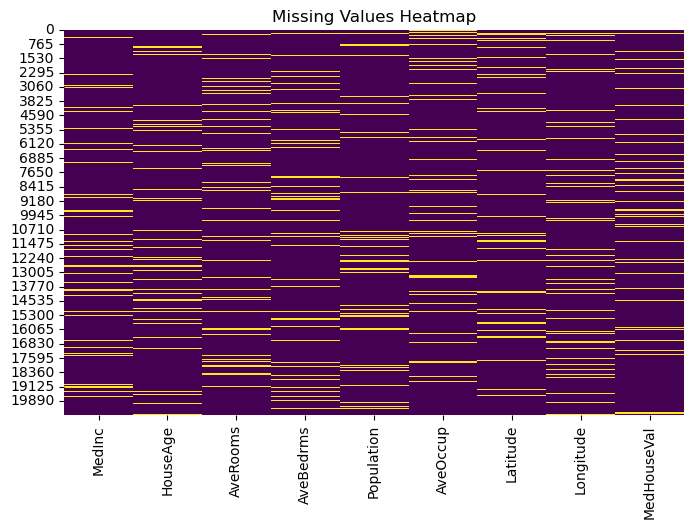

In [8]:
# 3. Visualize Missing Data

# (a) Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df_missing.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

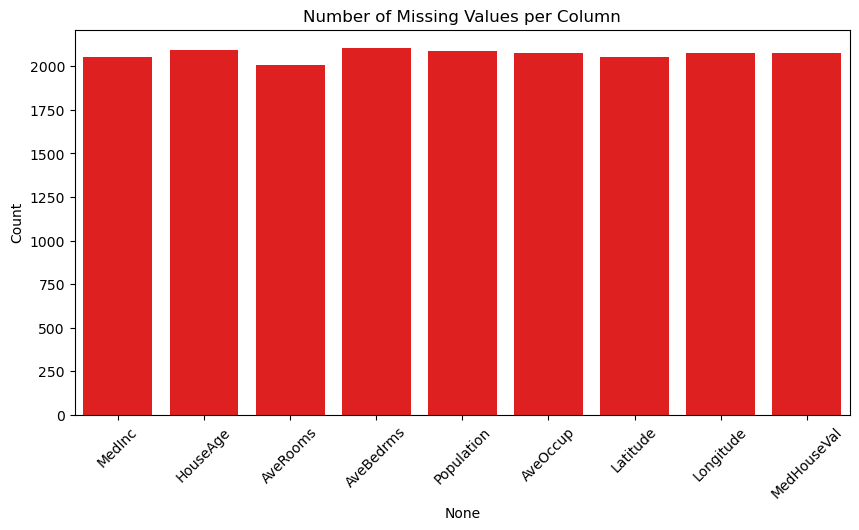

In [9]:
# (b) Bar Plot - count of missing values per column
missing_counts = df_missing.isnull().sum()
plt.figure(figsize=(10,5))
sns.barplot(x=missing_counts.index, y=missing_counts.values, color="red")
plt.xticks(rotation=45)
plt.title("Number of Missing Values per Column")
plt.ylabel("Count")
plt.show()

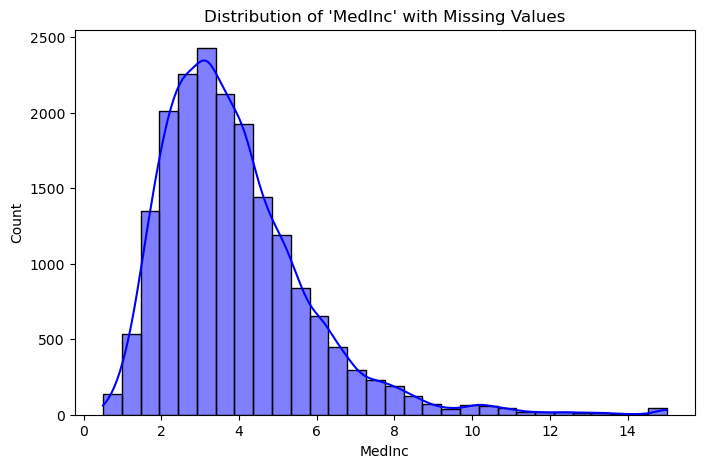

In [12]:
# (d) Histogram Example - distribution of one column with missing values
col = "MedInc"
plt.figure(figsize=(8,5))
sns.histplot(df_missing[col], bins=30, kde=True, color="blue")
plt.title(f"Distribution of '{col}' with Missing Values")
plt.show()

# Here we apply KNN to fill the Missing data

## 🔎 Explanation of k-NN Imputation
### 1. Why we need it?

When some values are missing (NaN), many ML algorithms cannot handle them directly.
Instead of simply dropping rows (which loses data) or filling with mean/median (which ignores feature relationships), k-Nearest Neighbors (k-NN) imputation finds the most similar samples and uses them to estimate the missing value.

### 2. What happens in this line?
imputer = KNNImputer(n_neighbors=5)

### KNNImputer → class from scikit-learn designed to fill missing values.

### n_neighbors=5 → means the imputer will look at the 5 most similar rows (neighbors) to estimate the missing value.

How similarity is measured?
👉 By Euclidean distance between rows, considering only the features that are not missing.

df_imputed = pd.DataFrame(imputer.fit_transform(df_missing), columns=df.columns)

imputer.fit_transform(df_missing) → applies k-NN imputation to the dataset:

For each missing value in a row, the imputer finds the 5 closest rows (neighbors).

It then takes the average of their values in that column to fill the missing spot.

pd.DataFrame(..., columns=df.columns) → turns the imputed NumPy array back into a DataFrame with the original column names.



### Why k-NN is better than mean/median imputation?

Preserves relationships between features (e.g., older houses tend to have different prices).

More context-aware than global mean filling.

Works well if dataset is not too large (can be slow with very large data).

In [13]:
# 4. Apply k-NN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_missing), columns=df.columns)

print("✅ Missing values after imputation:")
print(df_imputed.isnull().sum())

✅ Missing values after imputation:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


# 5. Compare distributions before & after imputation

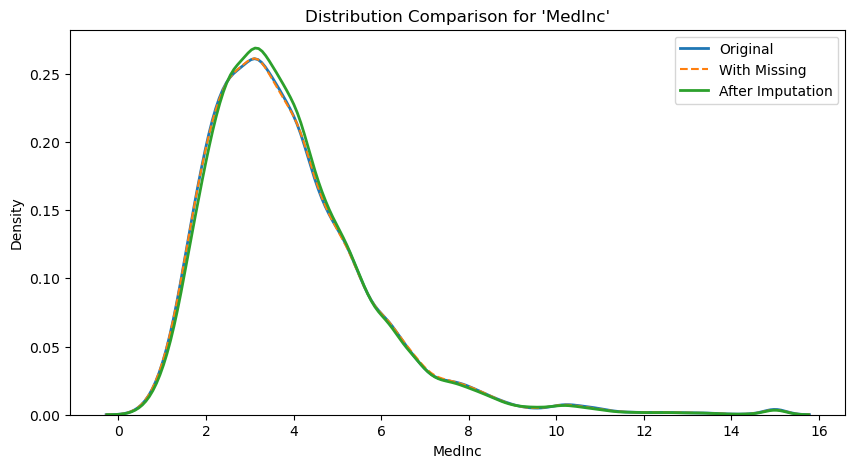

In [15]:
# 5. (a) Compare distributions before & after imputation
col = "MedInc"  # median income column
plt.figure(figsize=(10,5))
sns.kdeplot(df[col], label="Original", linewidth=2)
sns.kdeplot(df_missing[col], label="With Missing", linestyle="--")
sns.kdeplot(df_imputed[col], label="After Imputation", linewidth=2)
plt.legend()
plt.title(f"Distribution Comparison for '{col}'")
plt.show()

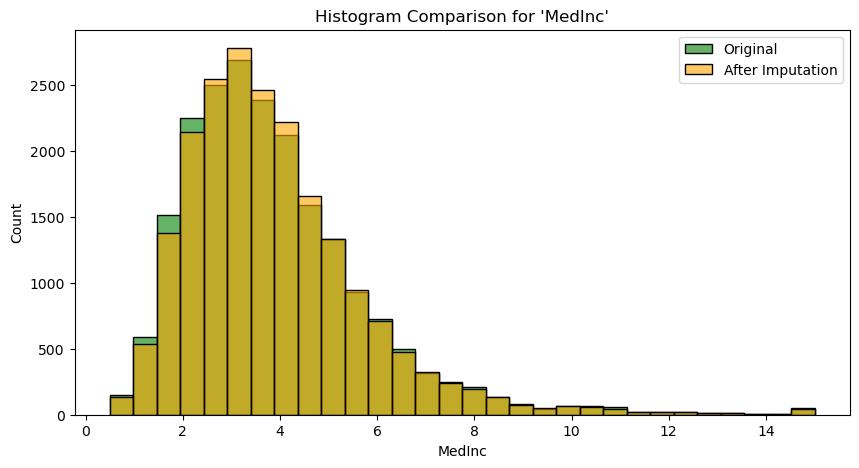

In [16]:
# (b) Histogram comparison
plt.figure(figsize=(10,5))
sns.histplot(df[col], bins=30, label="Original", color="green", alpha=0.6, kde=False)
sns.histplot(df_imputed[col], bins=30, label="After Imputation", color="orange", alpha=0.6, kde=False)
plt.legend()
plt.title(f"Histogram Comparison for '{col}'")
plt.show()



# 6. Show a small comparison table (before vs after imputation)

In [19]:
# 6. Show a small comparison table (before vs after imputation)
comparison = pd.DataFrame({
    "Original": df[col].head(10).values,
    "With Missing": df_missing[col].head(10).values,
    "Imputed": df_imputed[col].head(10).values
})
comparison

,Original,With Missing,Imputed
0,8.3252,8.3252,8.32520
1,8.3014,8.3014,8.30140
2,7.2574,7.2574,7.25740
3,5.6431,5.6431,5.64310
4,3.8462,3.8462,3.84620
5,4.0368,4.0368,4.03680
6,3.6591,3.6591,3.65910
7,3.1200,3.1200,3.12000
8,2.0804,NaN,3.50988
9,3.6912,3.6912,3.69120


# "Understanding Distributions"
1. Normal (Bell-shaped) Distribution

Symmetric around the mean

Example: Heights of people

2. Left-Skewed (Negative Skew)

Long tail on the left

Example: Age at retirement (most people retire around 60–65, fewer at very young ages)

3. Right-Skewed (Positive Skew)

Long tail on the right

Example: House prices (many affordable houses, few very expensive mansions)

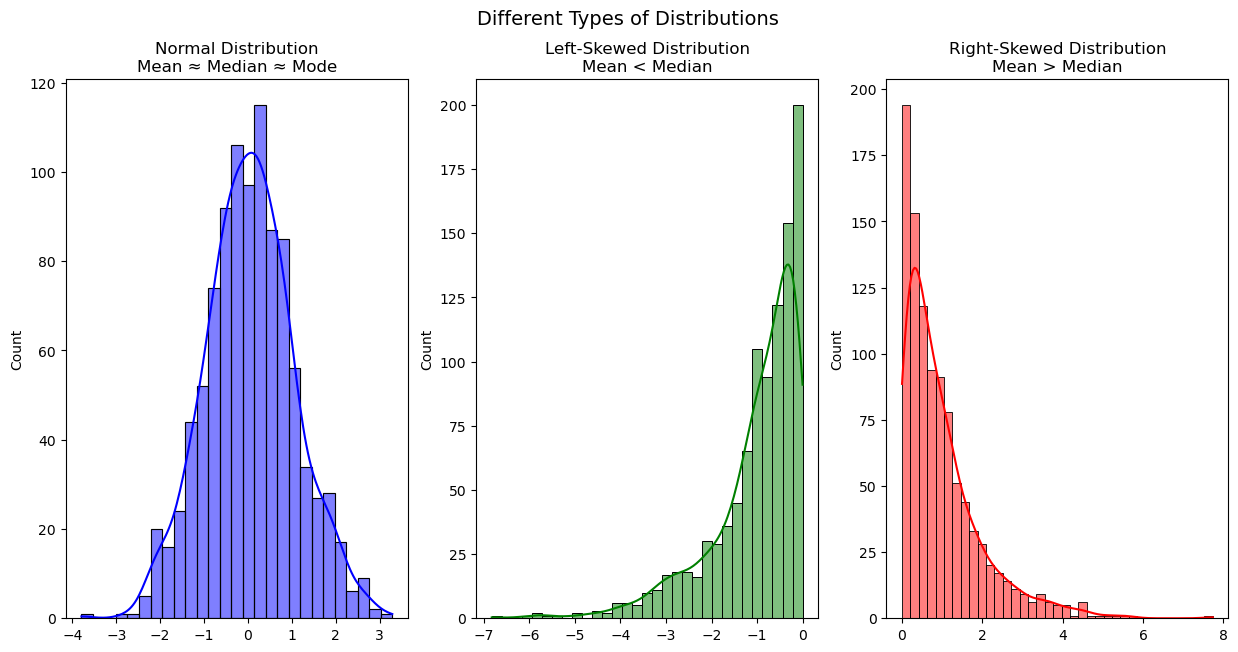

In [21]:


# Generate data
normal = np.random.normal(loc=0, scale=1, size=1000)
right_skewed = np.random.exponential(scale=1, size=1000)
left_skewed = -np.random.exponential(scale=1, size=1000)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15,7))

sns.histplot(normal, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Normal Distribution\nMean ≈ Median ≈ Mode")

sns.histplot(left_skewed, kde=True, ax=axes[1], color="green")
axes[1].set_title("Left-Skewed Distribution\nMean < Median")

sns.histplot(right_skewed, kde=True, ax=axes[2], color="red")
axes[2].set_title("Right-Skewed Distribution\nMean > Median")

plt.suptitle("Different Types of Distributions", fontsize=14)
plt.show()
